<a href="https://colab.research.google.com/github/Burakgunal4/Data-Warehousing-and-Business-Intelligence-CW2/blob/main/Data_Warwhousing_and_Business_Intelligence_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Warehousing and Business Intelligence CW2

In [ ]:
#Test

import pandas as pd


# read rhe file
df = pd.read_csv('/content/final_bank_transaction_folder.csv')

# show first 5 line
df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
# How many missing values ​​are there in which columns?
df.isnull().sum()


,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
# Remove rows containing nulls
df_cleaned = df.dropna()


In [ ]:
print("Number of rows in the original data set:", len(df))
print("Number of rows in the cleaned dataset:", len(df_cleaned))


Number of rows in the original data set: 1048567
Number of rows in the cleaned dataset: 1041614


In [ ]:
# take a look at the column names
df_cleaned.columns


Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [ ]:
df_cleaned[df_cleaned['TransactionAmount (INR)'].astype(float) <= 0]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
384,T385,C6117158,25/9/89,M,BANGALORE,128.84,21/10/16,74817,0.0
2498,T2499,C9074213,10/6/88,M,BANGALORE,15834.56,21/10/16,154219,0.0
2623,T2624,C7930692,16/7/93,M,HYDERABAD,5795.30,21/10/16,152742,0.0
2672,T2673,C4397046,13/1/97,M,MUMBAI,185401.34,21/10/16,30017,0.0
4083,T4084,C4227711,3/12/91,M,NEW DELHI,11846.77,22/9/16,70059,0.0
...,...,...,...,...,...,...,...,...,...
1029145,T1029146,C5524842,29/6/63,F,GURGAON,173469.49,13/9/16,33929,0.0
1032164,T1032165,C9026149,15/9/90,M,DERABASSI,8.79,13/9/16,110728,0.0
1036358,T1036359,C5936956,1/1/1800,M,GURGAON,48.90,18/9/16,115328,0.0
1038286,T1038287,C7633429,1/1/1800,M,N T PUNE,181600.42,18/9/16,53145,0.0


In [ ]:
# Show how many lines are left and how many lines are deleted
print("Number of rows in the cleaned dataset:", len(df_cleaned))


Number of rows in the cleaned dataset: 1041614


In [ ]:
df_cleaned['TransactionAmount (INR)'].describe()


,TransactionAmount (INR)
count,1.041614e+06
mean,1.566096e+03
std,6.561464e+03
min,0.000000e+00
25%,1.600000e+02
50%,4.575000e+02
75%,1.200000e+03
max,1.560035e+06


In [ ]:
from datetime import datetime

# Get current year information
current_year = datetime.now().year

#Calculate age by birth year
df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')
df_cleaned['Age'] = current_year - df_cleaned['CustomerDOB'].dt.year


<ipython-input-13-5fc71f04a2fa>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')
<ipython-input-13-5fc71f04a2fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], errors='coerce')
<ipython-input-13-5fc71f04a2fa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
#We check the ages, for example, is there someone who is 150 years old?
df_cleaned['Age'].describe()


,Age
count,1.041614e+06
mean,3.996133e+01
std,5.035605e+01
min,-4.900000e+01
25%,3.300000e+01
50%,3.700000e+01
75%,4.200000e+01
max,2.250000e+02


In [ ]:
# Cleanse those under 18 or over 100 years old
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 18) & (df_cleaned['Age'] <= 100)]


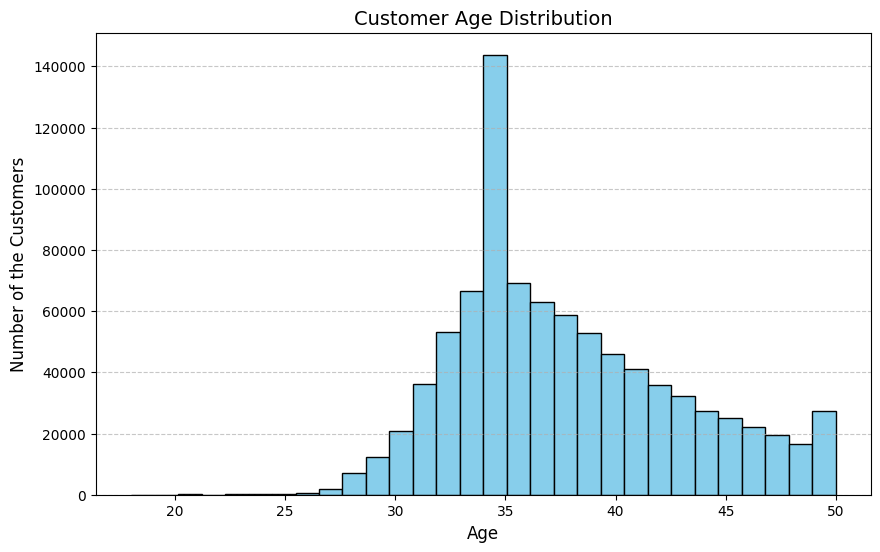

In [ ]:
import matplotlib.pyplot as plt

# Chart size
plt.figure(figsize=(10,6))

# Plot the histogram
plt.hist(df_cleaned['Age'], bins=30, edgecolor='black', color='skyblue')

# Title and tags
plt.title('Customer Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of the Customers', fontsize=12)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show
plt.show()


In [ ]:
# Calculate the number of transactions by location and return the top 5
top_locations = df_cleaned['CustLocation'].value_counts().head(5)

# Show results
print(top_locations)


CustLocation
MUMBAI       86339
BANGALORE    70760
NEW DELHI    66241
GURGAON      62806
DELHI        60564
Name: count, dtype: int64


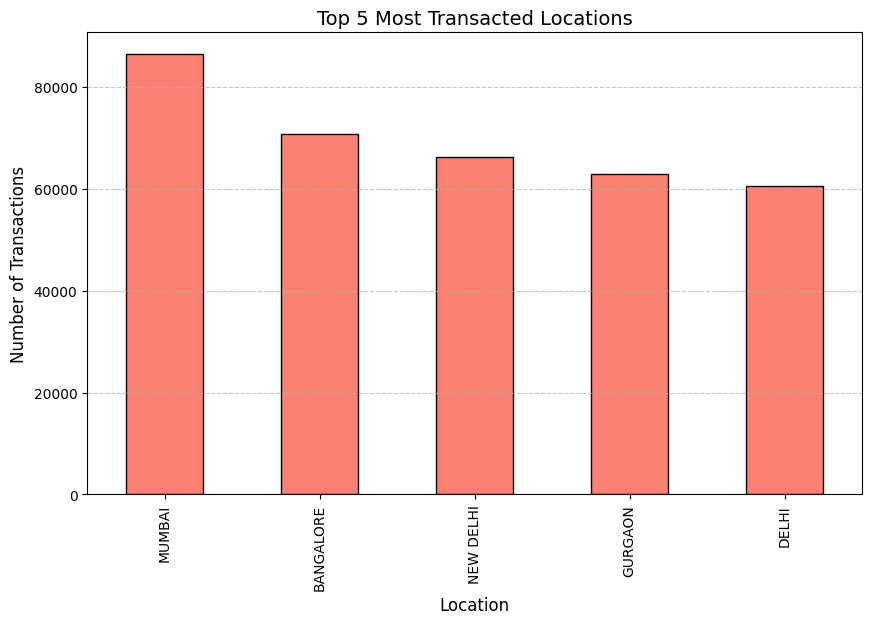

In [ ]:
# We visualize the top_locations series we found earlier as a bar chart
top_locations.plot(kind='bar',                 # Chart type: bar chart
                   color='salmon',            # Bar color
                   edgecolor='black',         # Make the bar border black
                   figsize=(10,6))            # Chart size (width x height)

# Add title to chart
plt.title('Top 5 Most Transacted Locations', fontsize=14)

# Names of X and Y axes
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Grid lines along the Y axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Print the graphic to the screen
plt.show()


In [ ]:
import pandas as pd
from datetime import datetime

# Read the CSV file
df = pd.read_csv('/content/final_bank_transaction_folder.csv')

# Convert TransactionDate column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Check the latest version
df.head()


<ipython-input-20-b916dad3e338>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [ ]:
# Analysis date
today_date = datetime(2025, 4, 28)

# Recency: Days since last transaction date
rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (today_date - x.max()).days,   # Recency
    'TransactionID': 'count',                                   # Frequency
    'TransactionAmount (INR)': 'sum'                            # Monetary
})


In [ ]:
# Change column names
rfm.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

# Show top 5 customers
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
C1010011,3136,2,5106.0
C1010012,3179,1,1499.0
C1010014,3216,2,1455.0
C1010018,3147,1,30.0
C1010024,3175,1,5000.0


In [ ]:
# Examine RFM values ​​statistically
rfm.describe()


,Recency,Frequency,Monetary
count,884265.000000,884265.000000,8.842650e+05
mean,3190.747135,1.185806,1.866856e+03
std,80.030366,0.450683,7.207210e+03
min,3062.000000,1.000000,0.000000e+00
25%,3148.000000,1.000000,2.000000e+02
50%,3171.000000,1.000000,5.368000e+02
75%,3215.000000,1.000000,1.500000e+03
max,3398.000000,6.000000,1.560035e+06


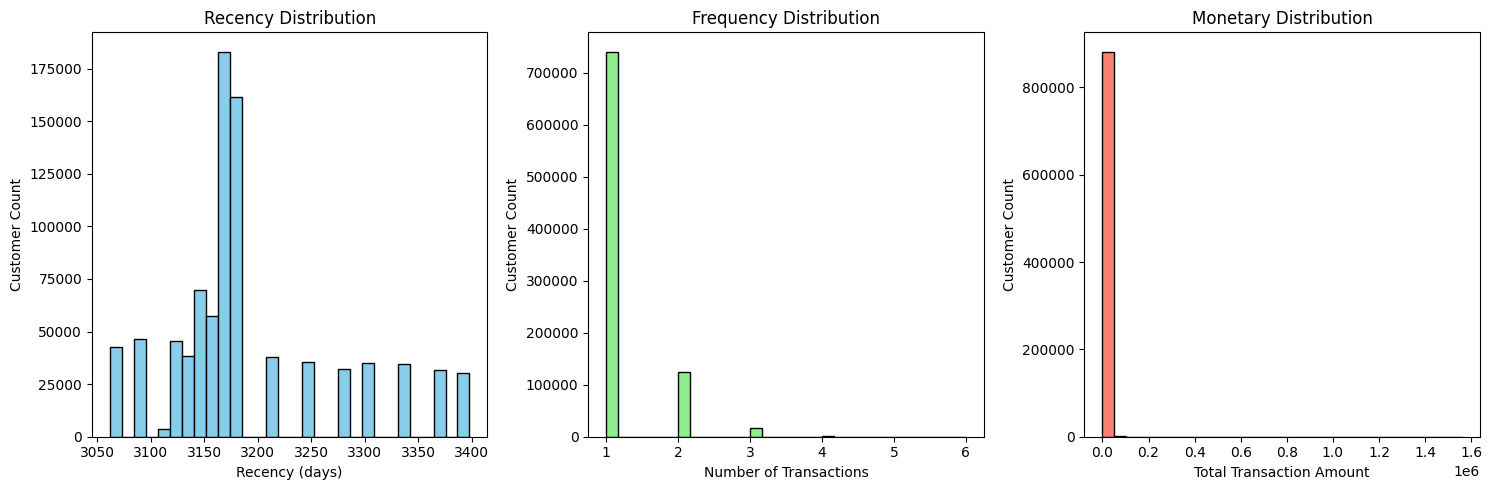

In [ ]:
import matplotlib.pyplot as plt

# Adjust chart size
plt.figure(figsize=(15,5))

# Recency Histogram
plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Customer Count')

# Frequency Histogram
plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer Count')

# Monetary Histogram
plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Customer Count')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate skewness values
print("Recency Skewness:", rfm['Recency'].skew())
print("Frequency Skewness:", rfm['Frequency'].skew())
print("Monetary Skewness:", rfm['Monetary'].skew())


Recency Skewness: 1.0202131010949373
Frequency Skewness: 2.601672542317087
Monetary Skewness: 42.833929931285574


In [ ]:
import numpy as np

# Apply log1p transformation to reduce skewness
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])


In [ ]:
print("Recency_log Skewness:", rfm['Recency_log'].skew())
print("Frequency_log Skewness:", rfm['Frequency_log'].skew())
print("Monetary_log Skewness:", rfm['Monetary_log'].skew())


Recency_log Skewness: 0.9645899062880662
Frequency_log Skewness: 2.193506607421848
Monetary_log Skewness: -0.21260022845067894
